In [1]:
from wordcloud import WordCloud
from collections import Counter
from re import match
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from konlpy.tag import Okt  

data = pd.read_csv("/Users/doyun/2020_text_mining/jobkorea_data.csv")

okt=Okt()

In [2]:
%time okt_nouns = okt.nouns(''.join(str(data['답변'].fillna(''))))
okt_nouns[-10:]

CPU times: user 5.73 s, sys: 220 ms, total: 5.95 s
Wall time: 2.34 s


['전공', '과목', '중', '소비자', '행동', '분석', '사교육', '마케팅', '관', '답변']

In [3]:
ap_progra = data.loc[data['직무분야'] == "DBA·데이터베이스", "답변"]
nouns = okt.nouns(''.join(str(ap_progra.fillna(''))))
nouns = [n for n in nouns if len(n) > 1]
nouns = [n for n in nouns if not(match('^[0-9]',n))]
count = Counter(nouns)
top = count.most_common(40)

In [4]:
my_font_path = '/Users/doyun/Library/Fonts/NanumBarunGothic.ttf'

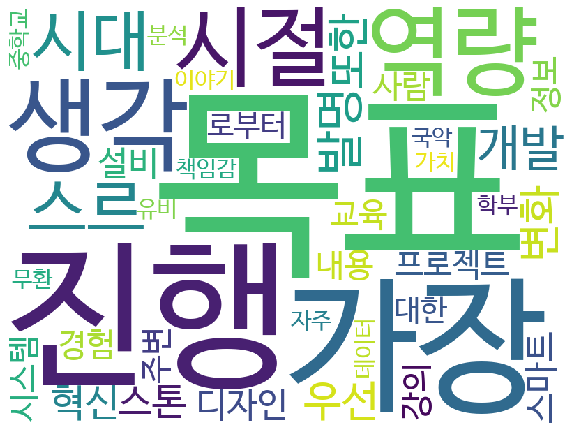

In [5]:
wordcloud = WordCloud(font_path=my_font_path, 
                   background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(top))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)